<font size="6"><strong><center><center></strong></font>

# Healthcare : Cardiovascular diseases Prediction

### Course-end Project 5




## Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

Dataset description:


Variable	Description
Age	Age in years
Sex	1 = male; 0 = female
cp|	Chest pain type
Trestbps	Resting blood pressure (in mm Hg on admission to the hospital)
Chol	Serum cholesterol in mg/dl
Fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
Restecg	Resting electrocardiographic results
Thalach	Maximum heart rate achieved
Exang	Exercise induced angina (1 = yes; 0 = no)
Oldpeak	ST depression induced by exercise relative to rest
slope	Slope of the peak exercise ST segment
ca	Number of major vessels (0-3) colored by fluoroscopy
thal	3 = normal; 6 = fixed defect; 7 = reversible defect
Target	1 or 0



Note:

Download CEP 1_ Dataset.xlsx using the link given in the Healthcare project problem statement


Task to be performed:
1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
c.	Study the occurrence of CVD across the Age category
d.	Study the composition of all patients with respect to the Sex category
e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
f.	Describe the relationship between cholesterol levels and a target variable
g.	State what relationship exists between peak exercising and the occurrence of a heart attack
h.	Check if thalassemia is a major cause of CVD
i.	List how the other factors determine the occurrence of CVD
j.	Use a pair plot to understand the relationship between all the given variables
3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection






### DESCRIPTION

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from google.colab import files 
uploaded=files.upload()

Saving 1645792390_cep1_dataset.csv to 1645792390_cep1_dataset (1).csv


In [78]:
data=pd.read_csv('1645792390_cep1_dataset.csv')

In [79]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# **REMOVAL OF OUTLIERS USING BOXPLOT**

In [81]:
data.shape

(303, 14)

In [82]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()
  

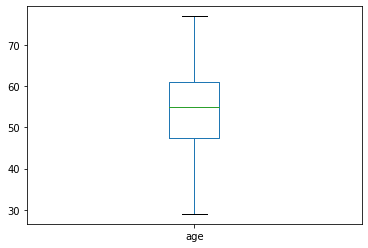

In [83]:
plot_boxplot(data,'age')

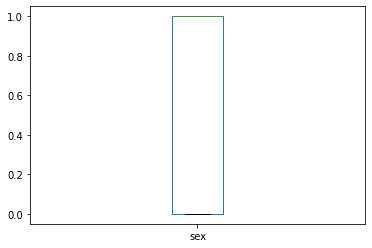

In [84]:
plot_boxplot(data,'sex')

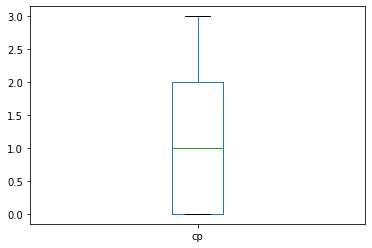

In [85]:
plot_boxplot(data,'cp')

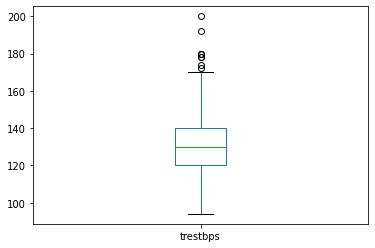

In [86]:
plot_boxplot(data,'trestbps')

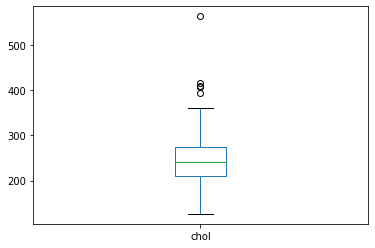

In [87]:
plot_boxplot(data,'chol')

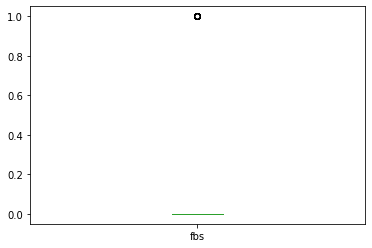

In [88]:
plot_boxplot(data,'fbs')

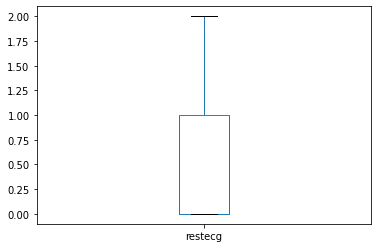

In [89]:
plot_boxplot(data,'restecg')

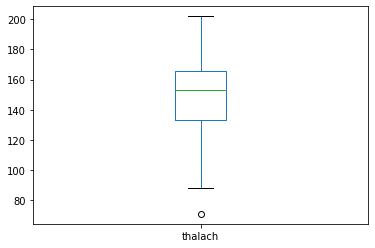

In [90]:
plot_boxplot(data,'thalach')

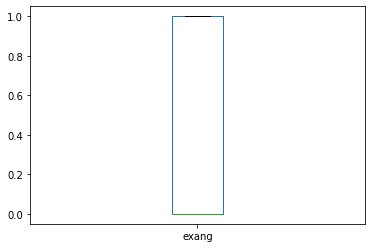

In [91]:
plot_boxplot(data,'exang')

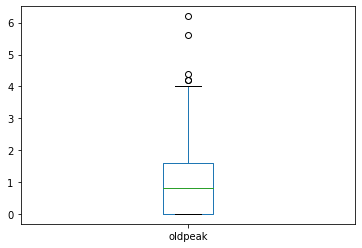

In [92]:
plot_boxplot(data,'oldpeak')

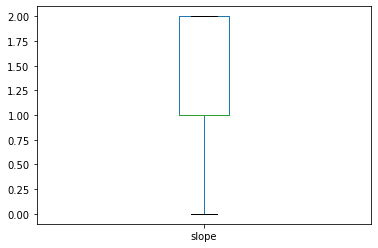

In [93]:
plot_boxplot(data,'slope')

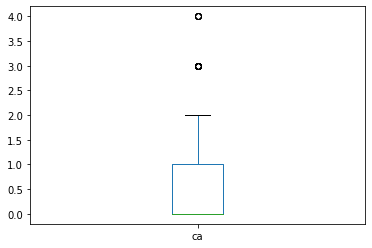

In [94]:
plot_boxplot(data,'ca')

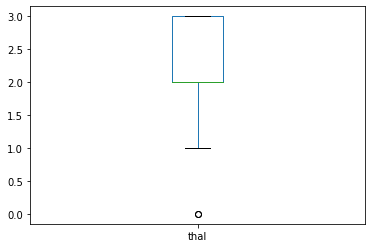

In [95]:
plot_boxplot(data,'thal')

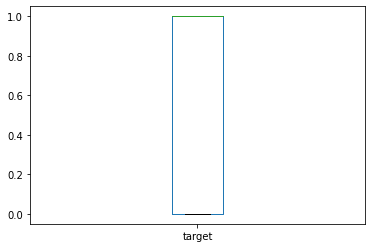

In [96]:
plot_boxplot(data,'target')

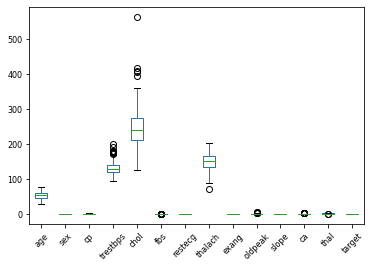

In [97]:
data.boxplot(grid=False,rot=45,fontsize=8)

In [98]:
def Outlier(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  lt=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
  return lt

In [99]:
index_list=[]
for feature in data.columns:
  index_list.extend(Outlier(data,feature))

In [100]:
index_list

[8,
 101,
 110,
 203,
 223,
 241,
 248,
 260,
 266,
 28,
 85,
 96,
 220,
 246,
 0,
 8,
 14,
 23,
 26,
 28,
 29,
 36,
 60,
 64,
 76,
 78,
 83,
 87,
 90,
 93,
 97,
 99,
 103,
 106,
 111,
 136,
 137,
 169,
 170,
 176,
 197,
 203,
 214,
 215,
 217,
 219,
 222,
 223,
 231,
 251,
 252,
 260,
 269,
 278,
 281,
 282,
 292,
 297,
 300,
 272,
 101,
 204,
 221,
 250,
 291,
 52,
 92,
 97,
 99,
 158,
 163,
 164,
 165,
 181,
 191,
 204,
 208,
 217,
 220,
 231,
 234,
 238,
 247,
 249,
 250,
 251,
 252,
 255,
 267,
 291,
 48,
 281]

In [101]:
def remove(df,lt):
  lt=sorted(set(lt))
  df=df.drop(lt)
  return df

In [102]:
data=remove(data,index_list)

In [103]:
data.shape

(228, 14)

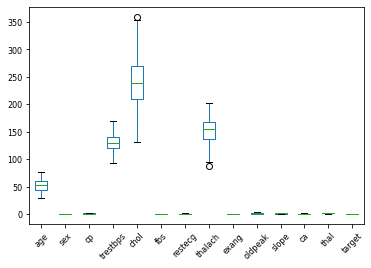

In [104]:
data.boxplot(grid=False,rot=45,fontsize=8)

In [105]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

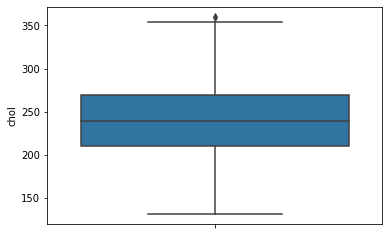

In [106]:
sns.boxplot(y='chol', data=data)

In [107]:
data['chol'].mean()

242.37280701754386

In [108]:
data= data[data['chol']<360]

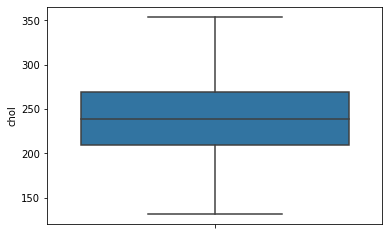

In [109]:
sns.boxplot(y='chol', data=data)

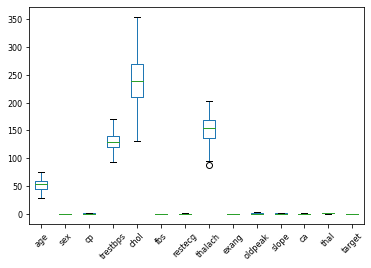

In [110]:
data.boxplot(grid=False,rot=45,fontsize=8)

In [111]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

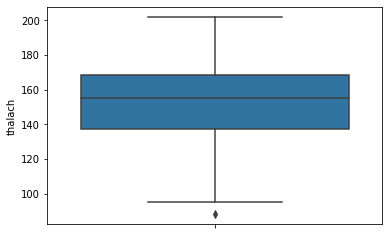

In [112]:
sns.boxplot(y='thalach', data=data)

In [113]:
data= data[data['thalach']>90]

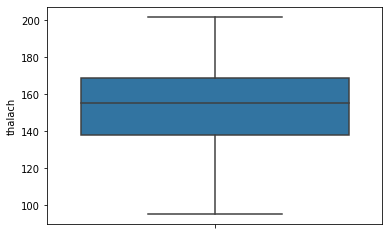

In [114]:
sns.boxplot(y='thalach', data=data)

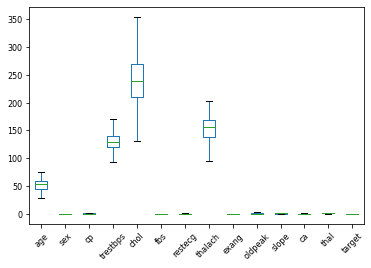

In [115]:
data.boxplot(grid=False,rot=45,fontsize=8)

# **HANDLING MISSING VALUES**



In [116]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [117]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


# **Data Balnacing using Synthetic Minority Over-sampling Technique(SMOTE)**

In [118]:
data.target.value_counts()

1    131
0     95
Name: target, dtype: int64

In [119]:
x=data.drop(['target'],axis=1)
y=data.target
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(180, 13) (180,)
(46, 13) (46,)


# Model Building

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model=KNeighborsClassifier()

In [124]:
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [125]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.717391304347826


col_0,0,1
target,,
0,12,6
1,7,21


In [127]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [129]:
x_smote_train,y_smote_train=smote.fit_resample(x_train.astype('float'),y_train)

In [130]:
from collections import Counter
print("Before applying SMOTE:",Counter(y_train))
print("After applying SMOTE:",Counter(y_smote_train))

Before applying SMOTE: Counter({1: 103, 0: 77})
After applying SMOTE: Counter({0: 103, 1: 103})


# **FEATURE SELECTION**

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [132]:
important_features = SelectKBest(score_func=chi2, k=13)
fit = important_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)
features_Scores = pd.concat([data_columns,data_scores],axis=1)
features_Scores.columns = ['Attributes','Score']

In [133]:
featureScores = features_Scores.sort_values(by='Score',ascending=False)
featureScores

,Attributes,Score
7,thalach,124.640161
9,oldpeak,49.698923
11,ca,45.498266
2,cp,33.241387
8,exang,25.869274
0,age,17.379361
4,chol,10.081915
1,sex,9.366036
12,thal,6.220528
10,slope,5.453146


In [134]:
data=data[['thalach','oldpeak','ca','cp','target']]

In [135]:
data.head()

,thalach,oldpeak,ca,cp,target
1,187,3.5,0,2,1
2,172,1.4,0,1,1
3,178,0.8,0,1,1
4,163,0.6,0,0,1
5,148,0.4,0,0,1


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
y=data['target']
X=data.drop(['target'],axis=1)

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [139]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(180, 4) (180,)
(46, 4) (46,)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm




# fit a model
lm = lm.LogisticRegression()
model = lm.fit(X_train, y_train)
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#model.score(X_test, y_test)
print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.942


In [141]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)

0.782608695652174


In [142]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=5)
# create the sub models
estimators = []
model1 = LogisticRegression().fit(x_test,y_test)
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('cart', model2))

# create the ensemble model
ensemble = VotingClassifier(estimators)

over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', ensemble)]
pipeline = Pipeline(steps=steps)


results = model_selection.cross_val_score(pipeline, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9917999999999999


In [143]:
from sklearn.impute import SimpleImputer

In [144]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [145]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [146]:
my_DT_model = DecisionTreeClassifier(criterion='entropy', random_state=2)

In [147]:
my_DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [148]:
my_DT_model.feature_importances_

array([0.41264523, 0.32160713, 0.0880592 , 0.17768844])

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
params = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,10], 'splitter' :['best', 'random']}

In [151]:
grid_search = GridSearchCV(my_DT_model, params, cv = 3, n_jobs = -1)

In [152]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 10],
                         'splitter': ['best', 'random']})

In [153]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [154]:
my_DT_model = DecisionTreeClassifier(criterion='gini', random_state=2, max_depth = 3, splitter = 'best')

In [155]:
my_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [156]:
my_preds = my_DT_model.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [158]:
accuracy_score(y_test, my_preds)

0.8260869565217391

Project Completed By : Santhosh TN.